In [111]:
import networkx as nx
import matplotlib.pyplot as plt

"""Modularity matrix of graphs.
"""
#    Copyright (C) 2004-2015 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.
from __future__ import division
import networkx as nx
from networkx.utils import not_implemented_for
__author__ = "\n".join(['Aric Hagberg <aric.hagberg@gmail.com>',
                        'Pieter Swart (swart@lanl.gov)',
                        'Dan Schult (dschult@colgate.edu)',
                        'Jean-Gabriel Young (Jean.gabriel.young@gmail.com)'])
__all__ = ['modularity_matrix', 'directed_modularity_matrix']


def modularity_matrix(G, nodelist=None):

    if nodelist is None:
        nodelist = G.nodes()
    A = nx.to_scipy_sparse_matrix(G, nodelist=nodelist, format='csr')
    k = A.sum(axis=1)
    m = G.number_of_edges()
    # Expected adjacency matrix
    X = k * k.transpose() / (2 * m)
    return A - X
)
def directed_modularity_matrix(G, nodelist=None):
    if nodelist is None:
        nodelist = G.nodes()
    A = nx.to_scipy_sparse_matrix(G, nodelist=nodelist, format='csr')
    k_in = A.sum(axis=0)
    k_out = A.sum(axis=1)
    m = G.number_of_edges()
    # Expected adjacency matrix
    X = k_out * k_in / m
    return A - X

"""Functions for computing communities based on centrality notions."""

def girvan_newman(G, most_valuable_edge=None):

    # If the graph is already empty, simply return its connected
    # components.
    if G.number_of_edges() == 0:
        yield tuple(nx.connected_components(G))
        return
    # If no function is provided for computing the most valuable edge,
    # use the edge betweenness centrality.
    if most_valuable_edge is None:
        def most_valuable_edge(G):
            """Returns the edge with the highest betweenness centrality
            in the graph `G`.

            """
            # We have guaranteed that the graph is non-empty, so this
            # dictionary will never be empty.
            betweenness = nx.edge_betweenness_centrality(G)
            return max(betweenness, key=betweenness.get)
    # The copy of G here must include the edge weight data.
    g = G.copy().to_undirected()
    # Self-loops must be removed because their removal has no effect on
    # the connected components of the graph.
    g.remove_edges_from(g.selfloop_edges())
    while g.number_of_edges() > 0:
        yield _without_most_central_edges(g, most_valuable_edge)



def _without_most_central_edges(G, most_valuable_edge):
    """Returns the connected components of the graph that results from
    repeatedly removing the most "valuable" edge in the graph.

    `G` must be a non-empty graph. This function modifies the graph `G`
    in-place; that is, it removes edges on the graph `G`.

    `most_valuable_edge` is a function that takes the graph `G` as input
    (or a subgraph with one or more edges of `G` removed) and returns an
    edge. That edge will be removed and this process will be repeated
    until the number of connected components in the graph increases.

    """
    original_num_components = nx.number_connected_components(G)
    num_new_components = original_num_components
    while num_new_components <= original_num_components:
        edge = most_valuable_edge(G)
        G.remove_edge(*edge)
        new_components = tuple(nx.connected_components(G))
        num_new_components = len(new_components)
    return new_components

### Political blogs data

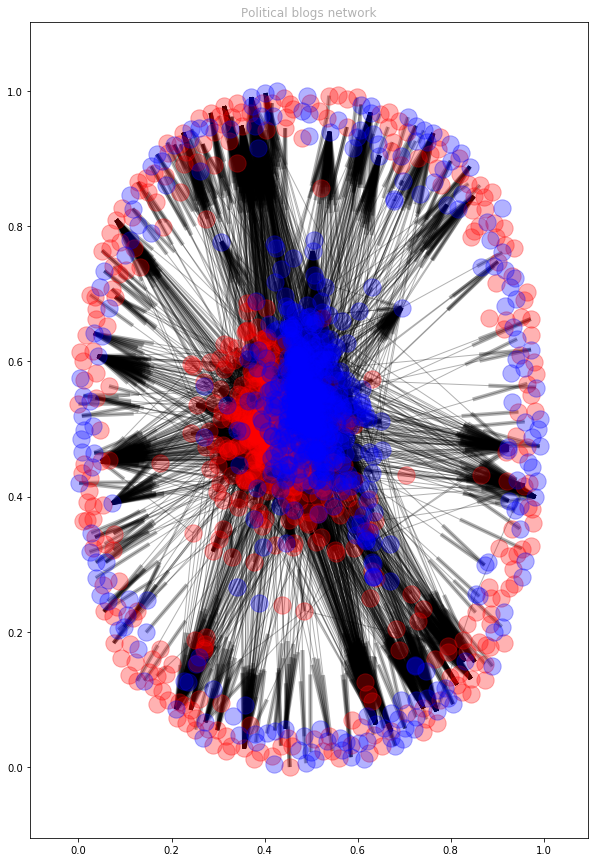

In [228]:
#import gml file, sepparate G1 (websites graph) and G2 (liberal vs conservative graph)
pol_blog = '/home/frank/Dropbox/school/Networks/data/pol_blog/polblogs.gml'
G1 = nx.read_gml(pol_blog)
pos1 = nx.spring_layout(G1)

lib_nodes = G1.subgraph( [n for n,d in G1.node.items() if d['value'] == 0])
cons_nodes = G1.subgraph( [n for n,d in G1.node.items() if d['value'] == 1])
nx.draw_networkx_nodes(lib_nodes, pos1,node_color='r', alpha = 0.3)
nx.draw_networkx_nodes(cons_nodes, pos1,node_color='b', alpha = 0.3)
nx.draw_networkx_edges(G1, pos1, alpha = 0.3)
plt.rcParams["figure.figsize"] = [20,20]
plt.title("Political blogs network", alpha = 0.3)
plt.plot()
plt.show()

In [219]:
pol_blog = '/home/frank/Dropbox/school/Networks/data/pol_blog/polblogs.gml'
G1 = nx.read_gml(pol_blog)

#Run girvan_newman and identify communities
comp = girvan_newman(G)
groupings = tuple(c for c in next(comp))

len(groupings)

Girvan Newman methdo has identified 270 communities in this set, with the total of 1490 nodes present(urls). Looking at the previous graph, where we cannot easily identify communities due to large mixture liberal and conservative blogs interconnected. 270 modules is significantly larger number of groupings and should be investigated with additional data about main geographical and demographical features of each website. 

In [234]:
G_1_undir = G1.to_undirected()

mod_1 = modularity_matrix(G_1_undir)

#Function to find largest eigenvalues.


import numpy as np
#from time import clock
from scipy.linalg import eigh as largest_eigh
from scipy.sparse.linalg.eigen.arpack import eigsh as largest_eigsh

N= 1490
k= 500

evals_large, evecs_large = largest_eigh(mod_1, eigvals=(N-k,N-1))

eigvals : tuple (lo, hi), optional
Indexes of the smallest and largest (in ascending order) eigenvalues and corresponding eigenvectors to be returned: 0 <= lo <= hi 

#### set2

In [198]:
import numpy as np
file2 = "/home/frank/Dropbox/school/Networks/data/Social_networks of pos_sentiment/prisoninter_st.txt"

G2_df = np.loadtxt(file2, delimiter=" ")
#columns = ['source','target','weight']

source = list(G2_df[:,0])
target = list(G2_df[:,1])
nodes = set(list(G2_df[:,1]))
edges = zip(source,target)

G2 = nx.Graph()
G2.add_nodes_from(nodes)
G2.add_edges_from(edges)

nx.draw(G2)
plt.title("Positive sentiments network", alpha = 0.3)
plt.plot()
plt.show()

In [226]:
compw = girvan_newman(G2)
groupings2 = tuple(c for c in next(compw))

In [227]:
len(groupings2)

2

Due to limited number of nodes, resolution limit hasn't been reached and no meaningful information can be obtained from the glande. However, 2 groups have been identified. 

In [ ]:
mod_1 = modularity_matrix(G2)
